# Ranking Distribution and SRCC

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import *
# import datetime
%load_ext autoreload
%autoreload 2
curr_dataset = 'ml-1m'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## optimizer

### Ranking Distribution in ml-1m

group len: 3, total config num: 127
opt_srcc: 0.05556


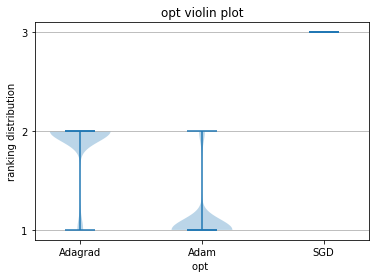

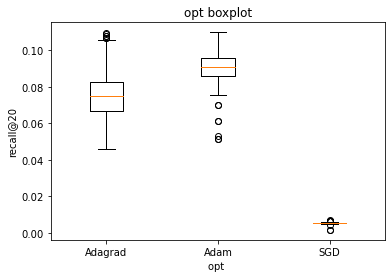

In [4]:
import json 
from utils import violin_plot
optgroups = np.array([[],[],[]],dtype='int32')
load_dict_list = []
for num in [20,21,22,23,24,25,28,29,30,31,32,33,34,35]:
     with open("opt_random/optinfo" + str(num) + ".json",'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          load_dict_list.append(load_dict_tmp)
          group_tmp = np.array(list(load_dict_tmp.values()))
          optgroups = np.concatenate((optgroups , group_tmp ), axis=1)
# load_dict = load_dict1.copy()

print("group len: {}, total config num: {}".format(len(optgroups), optgroups[0].shape[0]))
# print("group len: {}, shape: {}\ngroups: {}".format(len(groups), groups[0].shape, groups))
optranks = get_rank_from_score(optgroups)
opt_srcc = get_srcc_from_rank(groups=optgroups, ranks=optranks, optslist=['Adagrad', 'Adam', 'SGD'])
print("opt_srcc: {:.4}".format(opt_srcc))
viofig = violin_plot(groups=optgroups, xlabel=['Adagrad', 'Adam', 'SGD'], figtitle='opt ')
viofig.savefig(os.path.join('box_violin_plot', os.path.join('opt_violin_plot_'+curr_dataset)))
hpfig = hp_boxplot(groups=optgroups, xlabel=['Adagrad', 'Adam', 'SGD'], figtitle='opt ')
hpfig.savefig(os.path.join('box_violin_plot', os.path.join( 'opt_boxplot_'+curr_dataset)))

## learning rate

### Ranking Distribution in ml-1m

ranks.shape: (20, 12)
lrsrcc: 0.1162


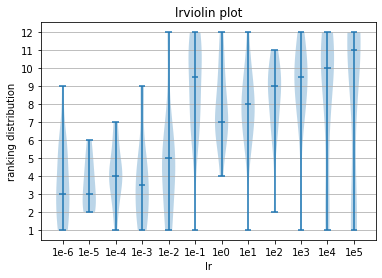

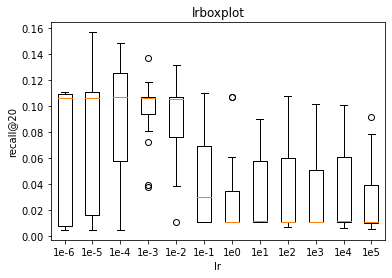

In [11]:
# random single model
import json 
import numpy as np
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
from utils import violin_plot, hp_boxplot, get_rank_from_score, get_srcc_from_rank
# lrgroups = np.array([[],[],[],[],[],[],[],[],[],[],[],[]],dtype='float')
lr_hp_list0 = ['1e-6','1e-5', '1e-4','1e-3', '1e-2', '1e-1', '1e0','1e1','1e2', '1e3', '1e4', '1e5']
lr_hp_list = [str(float(lr)) for lr in lr_hp_list0]
lrgroups = np.array([[] for item in lr_hp_list],dtype='float')

# load_dict_list = []
for num in [300,301,302,303]:
     with open("lr_random/lrinfo" + str(num) + ".json",'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          group_tmp = np.array(list(load_dict_tmp.values()))
          lrgroups = np.concatenate((lrgroups , group_tmp), axis=1)
lr_hp_num = 12
lrgroups = lrgroups[:lr_hp_num,:]
lrranks = get_rank_from_score(lrgroups)
# print(lrranks)
print("ranks.shape: {}".format(lrranks.shape))
lr_srcc = get_srcc_from_rank(groups=lrgroups, ranks=lrranks, optslist=lr_hp_list[:lr_hp_num])
print("lrsrcc: {:.4}".format(lr_srcc))
fig = violin_plot(groups=lrgroups, xlabel=lr_hp_list0[:lr_hp_num], figtitle='lr')
fig.savefig(os.path.join('box_violin_plot', os.path.join('learning_rate_violin_plot_'+curr_dataset)))
fig = hp_boxplot(groups=lrgroups, xlabel=lr_hp_list0[:lr_hp_num], figtitle='lr')
fig.savefig(os.path.join('box_violin_plot', os.path.join('learning_rate_boxplot_'+curr_dataset)))


## embedding size

### Ranking Distribution in ml-1m embs @ random single model

group len: 7, shape: (37,)
ranks.shape: (37, 7)
embsrcc: 0.6823530650625346


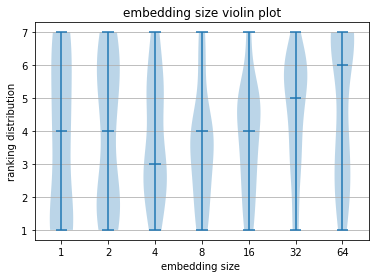

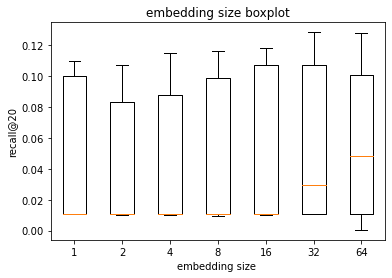

In [6]:
import json 
from utils import violin_plot
embs_hp_list = ['1','2', '4','8','16','32','64']
embgroups = np.array([[] for item in embs_hp_list],dtype='int32')
load_dict_list = []
embedding_dim_result_list_dict = {}

for embsize in embs_hp_list:
     embedding_dim_result_list_dict[embsize] = []
for num in [301,302,303,304,305]:
     # 12,15,17,18,19,20,21,22,23,30,31,32,33,34,35,36,37,38,39
     with open("emb_random/embinfo" + str(num) + ".json",'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          load_dict_list.append(load_dict_tmp)
          group_tmp = np.array(list(load_dict_tmp.values()))
          embgroups = np.concatenate((embgroups , group_tmp), axis=1)
# load_dict = load_dict1.copy()

print("group len: {}, shape: {}".format(len(embgroups), embgroups[0].shape))
embranks = get_rank_from_score(embgroups)
print("ranks.shape: {}".format(embranks.shape))
emb_srcc = get_srcc_from_rank(groups=embgroups, ranks=embranks, optslist=embs_hp_list)
print("embsrcc: {}".format(emb_srcc))
# print("group len: {}, shape: {}\ngroups: {}".format(len(groups), groups[0].shape, groups))
viofig = violin_plot(groups=embgroups, xlabel=embs_hp_list, figtitle='embedding size ')
viofig.savefig(os.path.join('box_violin_plot', os.path.join( 'embedding_size_violin_plot_' + curr_dataset)))

fig2 = hp_boxplot(groups=embgroups, xlabel=embs_hp_list, figtitle='embedding size ')
fig2.savefig(os.path.join('box_violin_plot', os.path.join( 'embedding_size_boxplot_'+curr_dataset)))

## weight decay

group len: 5, shape: (46,)
ranks.shape: (46, 5)
wd_srcc: 1.0


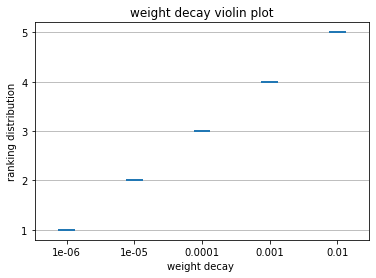

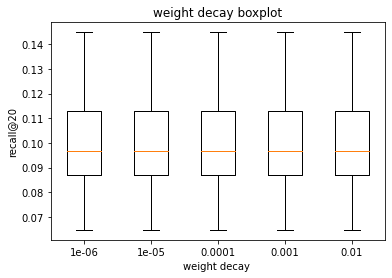

In [7]:
import json 
import numpy as np
from utils import *
wdgroups = np.array([[],[],[],[],[]],dtype='float')
load_dict_list = []
for num in [1,2,3,5,6,7]:
     with open("weight_random/weighdeinfo" + str(num) + ".json",'r', encoding='UTF-8') as f:
          load_dict_tmp = json.load(f)
          load_dict_list.append(load_dict_tmp)
          group_tmp = np.array(list(load_dict_tmp.values()))
          wdgroups = np.concatenate((wdgroups , group_tmp), axis=1)
# load_dict = load_dict1.copy()

print("group len: {}, shape: {}".format(len(wdgroups), wdgroups[0].shape))
wdranks = get_rank_from_score(wdgroups)
print("ranks.shape: {}".format(wdranks.shape))
wd_srcc = get_srcc_from_rank(groups=wdgroups, ranks=wdranks, optslist=['1e-06','1e-05', '0.0001','0.001','0.01'])
print("wd_srcc: {}".format(wd_srcc))
# print("group len: {}, shape: {}\ngroups: {}".format(len(groups), groups[0].shape, groups))
viofig = violin_plot(groups=wdgroups, xlabel=['1e-06','1e-05', '0.0001','0.001','0.01'], figtitle='weight decay ')
viofig.savefig(os.path.join('box_violin_plot',  'weight_decay_violin_plot_'+curr_dataset))
hpfig = hp_boxplot(groups=wdgroups, xlabel=['1e-06','1e-05', '0.0001','0.001','0.01'], figtitle='weight decay ')
hpfig.savefig(os.path.join('box_violin_plot', os.path.join( 'weight_decay_boxplot_'+curr_dataset)))

## SRCC show bar plot

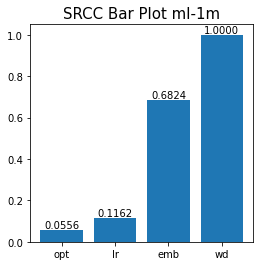

In [8]:
# 虚拟数据
x = ["opt", "lr", "emb", "wd"]
y = [opt_srcc, lr_srcc, emb_srcc, wd_srcc]

# 方式2（推荐）
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(x=x, height=y)
ax.set_title("SRCC Bar Plot ml-1m", fontsize=15)
for a,b in zip(x, y):
    plt.text(a,b, '%.4f'%b, ha='center',  va='bottom', )


## Others